[ 1.  0.] [ 1.  0.]
[-1.  0.] [-1.  0.]
[ 0.  1.] [ 0.  1.]
[ 0. -1.] [ 0. -1.]
[[ 1  0]
 [-1  0]
 [ 0  1]
 [ 0 -1]] [ 1.  1.  1.  1.]
[ 1.  0.] [ 1.  0.]
[-1.  0.] [-1.  0.]
[ 0.  1.] [ 0.  1.]
[ 0. -1.] [ 0. -1.]
direction: [ 1.    0.01] [ 0.   0.3]
0 0.405426438393
1 0.166761571463
[ 1.  0.] [ 1.  0.]
[-1.  0.] [-1.  0.]
[ 0.  1.] [ 0.  1.]
[ 0. -1.] [ 0. -1.]
direction: [ 1.    0.01] [ 0.    0.29]
0 0.399503747259
1 0.193658539897
[ 1.  0.] [ 1.  0.]
[-1.  0.] [-1.  0.]
[ 0.  1.] [ 0.  1.]
[ 0. -1.] [ 0. -1.]
direction: [ 1.    0.01] [ 0.    0.31]
0 0.411600413431
1 0.142374987386


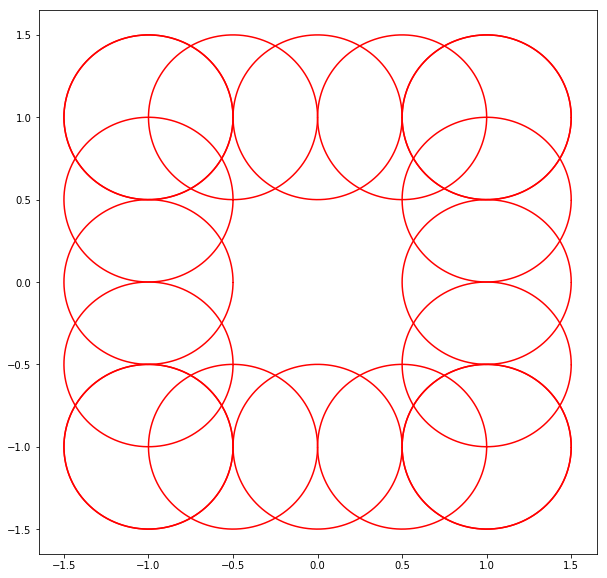

In [105]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/nbuser/library/')

from Polytope import Polytope
from Plane import Plane, Options
from symmetric import *
from far_point import * 
from make_cube import * 

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# plt.figure(figsize=(20,10))
# plt.gca().set_aspect('equal', adjustable='box')

dim = 2
draw_circles = True

delta = 0.5
radius = 0.5
depth = 0
options = Options(reflection = "sphere", \
                        delta = delta, radius = radius, depth = depth)
# cube = symmetric(dim, dim*4, options)
# cube = make_rotated_cube(dim)
cube = make_cube(dim, options)
print(cube.A, cube.b)

# zero = get_far_point(cube)
# print(np.linalg.norm(zero))
# cube.point = zero
# cube.point = np.zeros(dim)

plt.figure(figsize=(10, 10))
# for i in range(100):
#     lines = cube.reflection_lines(2, convergence_eps = 1e-6)
#     plt.plot([1, lines[1][1][0]], [0,lines[1][1][1]])
# lines = cube.cur_lines__

# lines = cube.reflection_lines(2, convergence_eps = 1e-6)

lines = [0] * 3
H = 0.3
lines[0] = make_cube(dim, options, zero = np.array([0,H])).reflection_lines(2, convergence_eps = 1e-6)
lines[1] = make_cube(dim, options, zero = np.array([0,H - 0.01])).reflection_lines(2, convergence_eps = 1e-6)
lines[2] = make_cube(dim, options, zero = np.array([0,H + 0.01])).reflection_lines(2, convergence_eps = 1e-6)


def plot_line(xs, vec, b):
    return b/vec[1] - (vec[0] * xs) / vec[1]

def plot_all_lines(polytope): 
    for p in polytope.planes:
        xs = np.arange(-3,3, 0.1)
        ys = plot_line(xs, p.perp_vec, p.b)
        plt.plot(xs, ys)
# plot_all_lines(cube)

def circ(x, y, r, phi):
  return (x + r * np.cos(phi), y + r*np.sin(phi))

def plot_circle(x, y, r):
    phis = np.arange(0,6.28,0.01)
    plt.plot(*circ(x, y, r, phis), c = 'r')

if draw_circles:
    for i in range(-1*int(1/delta), int(1/delta)+1):
        plot_circle(-1 - depth, i*delta, radius)
        plot_circle(1 + depth, i*delta, radius)
        plot_circle(i*delta, 1 + depth, radius)
        plot_circle(i*delta, -1 - depth, radius)

xx = 0
yy = 1
col = ['blue', 'red', 'black', 'green', 'purple']
c = 0
# for xx in range(0,dim):
#     for yy in range(xx+1,dim) :
# pts = []
# for i in range(len(lines)):
#     pt1 = [lines[i][0][xx], lines[i][0][yy]]
#     pt2 = [lines[i][1][xx], lines[i][1][yy]]
#     # pts.append(lines[i][0])
#     plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color = col[c])
# c += 1

# plt.scatter(centroid[0], centroid[1], color = 'blue')

# print("distance from centroid", np.linalg.norm(centroid))
# print("centroid approximation", centroid)

# plt.xlim(-2,2)
# plt.ylim(-2,2)
# plt.xticks(np.arange(-1, 2, 1))
# plt.yticks(np.arange(-1, 2, 1))
# plt.show()

In [38]:
def plot_all_circles(polytope): 
    for p in polytope.planes:
        xs = np.arange(-10,10, 0.1)
        ys = plot_line(xs, p.perp_vec, p.b)
        plt.plot(xs, ys)
        for i in np.arange(-10,10,0.1): 
            pt = p.nearest_gridpoint(np.array([i,0]))
            plot_circle(pt[0], pt[1], p.options.radius)

[(array([ 0. ,  0.3]), array([ 0.53942579,  0.30539426])), (array([ 0.53942579,  0.30539426]), array([-0.30049128, -0.54152833]))]
[(array([ 0.  ,  0.29]), array([ 0.54376078,  0.29543761])), (array([ 0.54376078,  0.29543761]), array([-0.2305624 , -0.55633236]))]
[(array([ 0.  ,  0.31]), array([ 0.53534352,  0.31535344])), (array([ 0.53534352,  0.31535344]), array([-0.36586226, -0.51832888]))]


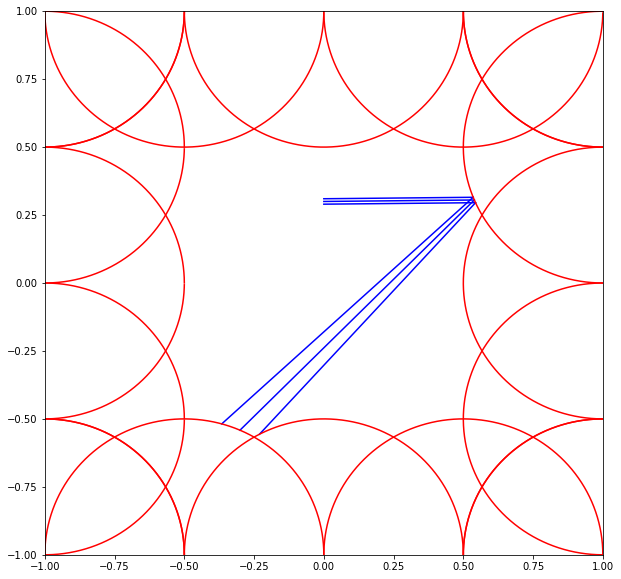

In [107]:
plt.figure(figsize=(10, 10))
# plt.xlim(-10,10)
# plt.ylim(-10,10)

left = 0
right = len(lines[0])
xx = 0
yy = 1
for line in lines:
    print(line)
    for i in range(left, right):
        pt1 = np.array([line[i][0][xx], line[i][0][yy]])
        pt2 = np.array([line[i][1][xx], line[i][1][yy]])
        # pts.append(lines[i][0])
    #     pt2 = pt2 + 2 * (pt2 - pt1)
        plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color = 'blue')
# plot_all_lines(cube)
# plot_all_circles(cube)
# plt.xlim(-2,2)
# plt.ylim(-2,2)

if draw_circles:
    for i in range(-1*int(1/delta), int(1/delta)+1):
        plot_circle(-1 - depth, i*delta, radius)
        plot_circle(1 + depth, i*delta, radius)
        plot_circle(i*delta, 1 + depth, radius)
        plot_circle(i*delta, -1 - depth, radius)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()